#Spotify Music Analysis 

Listening to music has become an everyday activity for most everyone. Whether listening in the car, on a walk, or to relax, our daily lives usually have some background music playing.
 
Our project aims to display the trends in songs over the years. We see how popularity is affected by genre and how that has changed over time. These metrics can possibly help us predict what will be popular in the future, and what makes a song catchy. We try to discover trends in the data that shed light on what makes a song good. Throughout our project, we will evaluate the popularities of genres and see how these trends have evolved over time. 
 
We will try to figure out what reasons we have these songs on loop for, or why we shut off the radio when they come on. 


For this project, we needed libraries such as pandas, numpy, matplotlib, seaborn, sqlite, and more

#Data Collection


As the first step in the data pipeline, we started with data collection. To analyze music, we used the world's most popular streaming platform, Spotify, from which to get our data. We used a [dataset](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019) of 2000 songs from the Top Hits on Spotify from years 1998 to 2020.

First, we import all the necessary libraries and then use pandas read_csv to input our data. We sort it by year to make it more manageable.
 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

data = pd.read_csv("songs_normalize.csv", encoding="ISO-8859-1")
#sort by year
data.sort_values(by='year',ascending=True)
#data

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
44,Missy Elliott,Hot Boyz,215466,True,1998,49,0.727,0.445,1,-11.241,1,0.2910,0.33900,0.000000,0.1800,0.527,81.125,"hip hop, pop, R&B"
82,Savage Garden,Crash and Burn,281466,False,1999,54,0.581,0.607,4,-8.458,1,0.0280,0.18900,0.000002,0.0882,0.213,102.030,pop
123,Crazy Town,Butterfly,216733,False,1999,71,0.736,0.811,9,-4.170,0,0.0810,0.00132,0.000142,0.1070,0.609,103.502,"rock, metal"
34,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.11600,0.000465,0.0710,0.686,84.110,pop
35,Montell Jordan,Get It On Tonite,276266,False,1999,59,0.813,0.491,10,-9.923,0,0.0770,0.24100,0.000046,0.0817,0.868,99.008,"hip hop, pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Lil' Kim,Magic Stick,359973,True,2019,47,0.849,0.498,2,-7.872,1,0.2720,0.11600,0.000045,0.2680,0.502,92.980,"hip hop, pop, R&B"
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
568,Will Smith,Switch,197666,False,2020,34,0.873,0.900,5,-4.325,0,0.1800,0.01070,0.000502,0.5560,0.478,102.516,"hip hop, pop"
308,t.A.T.u.,All The Things She Said,214440,True,2020,39,0.527,0.834,5,-5.767,0,0.0474,0.04110,0.005990,0.1050,0.381,179.920,pop


There are many attributes to the songs above, many of them are qualitative. For example, the “energy” a song has. Things like these were measured based off other factors such as loudness and tempo to extrapolate these values. 

In the dataset above, the columns correlate to 
 
-artist(who sang the song)<br>
-song(name)<br>
-duration_ms(how long the song is in milliseconds)<br>
-explicit(whether it has swear words, True or False)<br>
-year(what year it debuted)<br>
-popularity(given a score 0-100 how popular the song was)<br>
-danceability(a measure of how suitable the song is to dance to, based on multiple factors)<br>
-energy(how energetic the song feels)<br>
-key(what key the song was in, C=0, D=1 ...)<br>
-loudness(how loud the song was)<br>
-mode(whether it was in major or minor, major=1 minor=0)<br>
-speechiness(how much spoken words play a part, from 0-0.6)<br>
-acousticness(whether it was an acoustic track or not, higher number is more acoustic)<br>
-instrumentalness(inverse of speechiness, the more instrumentals the song has)<br>
-liveness(whether the song was performed live)<br>
-valence(how happy the song is from 0-1)<br>
-tempo(the Beats Per Minute of the song)<br>
-genre<br>
 


 
In order to make generalizations about the data, we first decided to see what genre was most common in the data set. This would give us a sense of what genres we were working with and which ones were most frequent on the Top Hits on Spotify. To accomplish this, we created a new list called *genres* and traveresed through the *genre* column in our *data* dataframe. For songs that fell under one genre, we simply added the element to the *genres* list. However, for songs that were listed as multiple genres, we accounted for this by adding each genre to the list seperately. For example, if a song has genres "hip hop, pop, R&B", we added each genre by splitting the string by the index of the commas, adding "hip hop", "pop", and "R&B" to the list. We then displayed the frequency of each genre in the *genres* list on a bar graph. 


Text(0, 0.5, 'Genre Frequency')

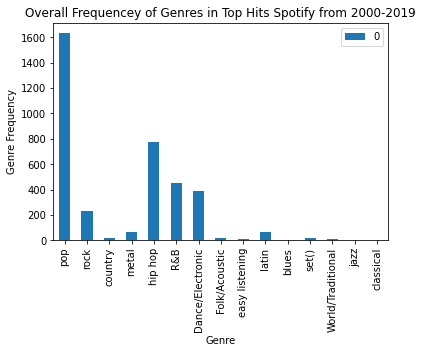

In [ ]:
from collections import Counter

genres = []

for genre in data['genre']:
    if "," in genre:
      commas = genre.count(',')
      while(commas > 0):
        c = genre.find(',')
        genres.append(genre[0:c])
        genre = genre[c+2:len(genre)]
        commas = commas - 1
      genres.append(genre)
    else: 
      genres.append(genre)

count = Counter(genres)
df = pd.DataFrame.from_dict(count, orient='index')
ax = df.plot(kind='bar', title='Overall Frequencey of Genres in Top Hits Spotify from 2000-2019')

ax.set_xlabel("Genre")
ax.set_ylabel("Genre Frequency")

Through the bar graph, we can see most of the songs we're analyzing are pop and hip hop, two more modern genres. This can tell us about how songs on Spotify are geared towards a younger audience, or that inherently by being a pop song, you have a better chance of being popular. 
 
There is such a small following for songs under metal and blues that people searching for new music will almost never explore that genre, making songs in that category doomed for obscurity. It’s similar to a snowball effect. The more popular a genre gets, the more followers it gets which makes them listen to more songs in that genre. The inverse is also true which is why we can see such a polarizing gap between the popular groups vs unpopular ones. 
 
Nowadays, if you want to create a viral song, it almost always has to be pop.


While we can use this bar graph to see the overarching most frequent genres in the Top Hits, it is not very precise, and the exact frequencies are not very clear due to its large scale. To further analyze the frequency of songs from a certain genre on the Top Hits and get a more quantative visualization of the data, we created a new dataframe, *genre_freq*. This dataframe displays the frequency of each genre every year, as well as the most frequent genre and its frequency. This table gives us a more exact, numerical approach to analyzing the data.

In order to fill the dataframe with the appropriate information, we first grouped the data from the original *data* dataframe by year. We then analyzed the songs from each year, adding the genres from each song to a list and adding the frequency to the new dataframe in the appropriate cell. We then found the most frequent genre of every year and its frequency by using the most_common() function in the Counter collection.


In [ ]:
from collections import Counter
from matplotlib import pyplot as plt

years = dict(tuple(data.groupby('year')))
years

most_common = []
freq = []

genre_freq = pd.DataFrame([], columns = ['year', 'pop', 'rock', 'country', 'metal', 'hip hop', 'R&B', 'Dance/Electronic', 'Folk/Acoustic', 'easy listening', 'latin', 'blues', 'set()', 'World/Traditional', 'jazz', 'classical', 'most_frequent_genre', 'frequency'])
genre_freq['year'] = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

for x in range(1999, 2020):
  genres = []

  for genre in years[x]["genre"]:
    if "," in genre:
      commas = genre.count(',')
      while(commas > 0):
        c = genre.find(',')
        genres.append(genre[0:c])
        genre = genre[c+2:len(genre)]
        commas = commas - 1
      genres.append(genre)
    else: 
      genres.append(genre)

  count = Counter(genres)

  for c in count:
    genre_freq.at[x-1999, c] = count[c]

  most_common.append(count.most_common(1)[0][0])
  freq.append(count.most_common(1)[0][1])

genre_freq['most_frequent_genre'] = most_common
genre_freq['frequency'] = freq
genre_freq = genre_freq.fillna(0)

genre_freq

,year,pop,rock,country,metal,hip hop,R&B,Dance/Electronic,Folk/Acoustic,easy listening,latin,blues,set(),World/Traditional,jazz,classical,most_frequent_genre,frequency
0,1999,29,8,1,3,7,8,3,1,1,3,1,1,0,0,0,pop,29
1,2000,57,13,0,8,21,25,5,3,0,3,0,0,1,0,0,pop,57
2,2001,92,16,3,8,32,37,12,1,0,3,0,0,0,0,0,pop,92
3,2002,74,14,0,5,46,32,3,2,1,0,0,1,0,0,0,pop,74
4,2003,79,14,0,12,34,34,10,0,1,3,1,0,1,1,0,pop,79
5,2004,66,11,0,1,43,30,9,0,0,2,0,4,2,0,0,pop,66
6,2005,81,19,3,5,51,31,5,4,1,3,0,1,2,1,0,pop,81
7,2006,75,14,2,1,27,28,6,0,0,3,0,1,2,0,0,pop,75
8,2007,71,20,0,6,40,34,9,0,0,2,2,2,0,0,0,pop,71
9,2008,83,14,0,6,35,37,7,2,1,1,0,0,0,0,0,pop,83


Through this new dataframe, we can see that in every single year data has been recorded, pop has been the most popular category. This is not out of line with our findings, but EVERY year for the past 20 years is quite a spectacle. Pop has held quite a grip on the top of the charts.

Using this dataframe, we can now see how the frequency of genres of songs in the Top Hits might have changed from 2000-2019. We felt as though a bar graph would be the best way to display this information. Instead of displaying all genres in this bar graph, we decided to focus on the 5 most frequent genres-- pop, hip hop, R&B, Dance/Electronic, and rock. 

We created the graph by ploting each genre's frequency over the years as a new bar and shifting its position to make the information more readable.  



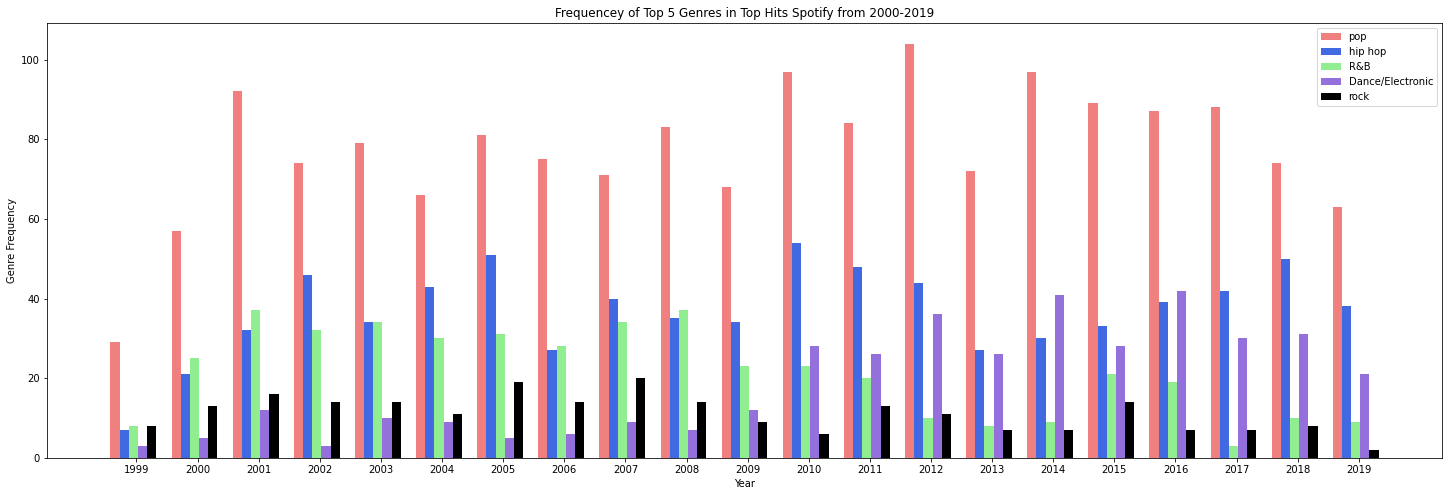

In [ ]:
#set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(25, 8))
 
#set height of bar
pop = genre_freq['pop'].to_list()
hip_hop = genre_freq['hip hop'].to_list()
r_b = genre_freq['R&B'].to_list()
dance = genre_freq['Dance/Electronic'].to_list()
rock = genre_freq['rock'].to_list()
 
#set position of bar on x axis
br1 = np.arange(len(pop))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
#make the plot
plt.bar(br1, pop, color ='lightcoral', width = barWidth, label ='pop')
plt.bar(br2, hip_hop, color ='royalblue', width = barWidth, label ='hip hop')
plt.bar(br3, r_b, color ='lightgreen', width = barWidth, label ='R&B')
plt.bar(br4, dance, color ='mediumpurple', width = barWidth, label ='Dance/Electronic')
plt.bar(br5, rock, color ='black', width = barWidth, label ='rock')

#plt.xticks(r + width/2, genre_freq['year'])
plt.xticks([r + 0.2 + barWidth for r in range(len(pop))], genre_freq['year'])
plt.legend()

plt.title("Frequencey of Top 5 Genres in Top Hits Spotify from 2000-2019")
plt.xlabel("Year")
plt.ylabel("Genre Frequency")

plt.show()

As expected, pop is the most frequent genre over the years; however, this graph does reveal some new information about the other genres. There is a flucuation in frequency for hip hop songs, rising and falling over the years. Rock also fluctuates, but mainly maintains a low frequency over the years in comparison to the other genres. However, 2 genres that do show an increasing and decreasing trend are R&B and Dance/Electronic. R&B, which was more frequent in the early 2000s, begins to fall around 2009/2010, whereas Dance/Electronic had the opposite effect and began to rise around that time-- essentially "swapping". This shift illustrates how people's preference in music began to change from 1999-2009 to 2010-2019, from soulful and rythmic to more upbeat and danceable.   

While it's clear that pop is the most frequent genre to appear in the Top Hits, does this mean that its also the most popular? To determine this in a quantitative manner, we created a new dataframe, *genre_pop*. This dataframe displays the average popularity score of each genre every year. This table gives us a more exact, numerical approach to analyzing the data.

In order to fill the dataframe with the appropriate information, we first grouped the data from the original *data* dataframe by year. We then analyzed the songs from each year, adding the genres from each song to a list and adding the popularity score to the new dataframe in the appropriate cell. Once this is complete for a year, we then divide each cell by the number of songs that fell under that genre, effectively finding the average popularity score.


In [ ]:
from collections import Counter
from matplotlib import pyplot as plt

years = dict(tuple(data.groupby('year')))
#print(years)

most_popular = []
score = []

genre_pop = pd.DataFrame([], columns = ['year', 'pop', 'rock', 'country', 'metal', 'hip hop', 'R&B', 'Dance/Electronic', 'Folk/Acoustic', 'easy listening', 'latin', 'blues', 'set()', 'World/Traditional', 'jazz', 'classical'])
genre_pop['year'] = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

genre_pop = genre_pop.fillna(0)

for x in range(1999, 2020):
  genres = []

  for genre, popularity in zip(years[x]["genre"], years[x]["popularity"]):
    if "," in genre:
      commas = genre.count(',')
      while(commas > 0):
        c = genre.find(',')
        genres.append(genre[0:c])
        genre_pop.at[x-1999, genre[0:c]] = genre_pop.at[x-1999, genre[0:c]] + popularity
        genre = genre[c+2:len(genre)]
        commas = commas - 1
      genres.append(genre)
      genre_pop.at[x-1999, genre] = genre_pop.at[x-1999, genre] + popularity
    else: 
      genres.append(genre)

  count = Counter(genres)

  for c in count:
    genre_pop.at[x-1999, c] = float(genre_pop.at[x-1999, c])/float(count[c])

genre_pop

,year,pop,rock,country,metal,hip hop,R&B,Dance/Electronic,Folk/Acoustic,easy listening,latin,blues,set(),World/Traditional,jazz,classical
0,1999,39,59,66,68,37,64,38,65,65,58,66,0,0,0,0
1,2000,39,56,0,54,43,48,43,45,0,20,0,0,69,0,0
2,2001,41,58,62,66,52,58,32,60,0,64,0,0,0,0,0
3,2002,44,58,0,71,48,56,38,66,60,0,0,0,0,0,0
4,2003,48,52,0,41,60,59,46,0,55,61,3,0,61,55,0
5,2004,45,35,0,60,39,60,42,0,0,35,0,0,60,0,0
6,2005,52,44,46,69,50,54,39,60,60,52,0,0,67,60,0
7,2006,39,16,0,0,60,55,37,0,0,80,0,0,48,0,0
8,2007,48,40,0,74,53,61,45,0,0,51,56,0,0,0,0
9,2008,45,56,0,66,58,55,43,54,60,52,0,0,0,0,0


Now, by looking down each genre column vertically, we can see how the average popularity changed over time, numerically.

Similar to how we created a bar graph displaying the top 5 most frequent genres over the years and how their frequencies changed over time, we also created a line graph displaying how the top 5 most frequent genres' average popularity changed over the years. Once again, this included the genres pop, hip hop, R&B, Dance/Electronic, and rock.

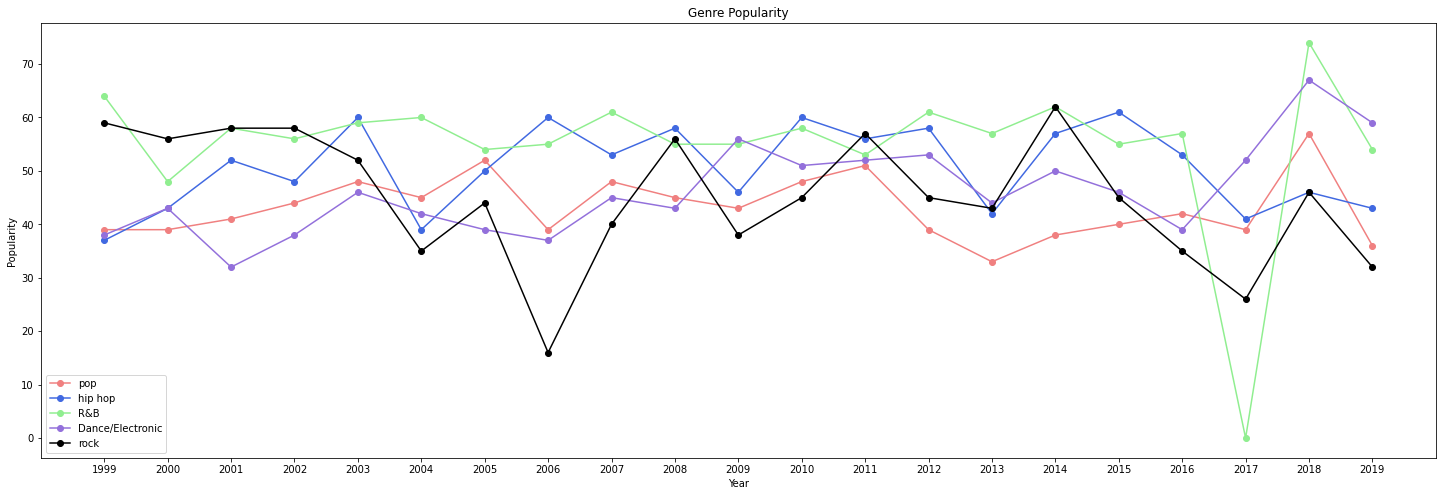

In [ ]:
plt.subplots(figsize =(25, 8))
plt.plot(genre_pop['year'], genre_pop['pop'], color='lightcoral', marker='o')
plt.plot(genre_pop['year'], genre_pop['hip hop'], color='royalblue', marker='o')
plt.plot(genre_pop['year'], genre_pop['R&B'], color='lightgreen', marker='o')
plt.plot(genre_pop['year'], genre_pop['Dance/Electronic'], color='mediumpurple', marker='o')
plt.plot(genre_pop['year'], genre_pop['rock'], color='black', marker='o')
plt.title('Genre Popularity')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend(['pop', 'hip hop', 'R&B', 'Dance/Electronic', 'rock'])
plt.show()

While we were expecting to see pop with the highest popularity due to its high frequency, we were surprised to see that this was not the case. Instead, it appears that R&B has the highest popularity score on average, omitting 2017. Hip hop follows closely behind, switching off with R&B as the most popular genre at certain points. Pop and Dance/Electronic generally maintain the same popularity over the years, maintaining in the 30-50 range. Rock's popularity frequently fluctuates, switching off from having a high and low popularity.

So, now that we determined that we can't exactly attribute a genre's popularity to its frequency on the Top Hits chart, what factors can we attribute? To find out, we decided to analyze factors such as liveliness, energy, and danceablity to see if they are possible factors that can affect a song's popularity. To do so, we averaged each genres's liveliness, energy, and danceability score and displayed how this changed over time using multiple line graphs.

In [ ]:

genres = []
years = []
energies = []
dance = []
live = []

for energy, danceability, liveness, year, genre in zip(data["energy"], data["danceability"], data["liveness"], data["year"], data["genre"]):
    if "," in genre:
      commas = genre.count(',')
      while(commas > 0):
        c = genre.find(',')
        if(genre == "pop" or genre == "hip hop" or genre == "Dance/Electronic" or genre == "R&B" or genre == "rock"):
          genres.append(genre[0:c])
          years.append(year)
          dance.append(danceability)
          energies.append(energy)
          live.append(liveness)
        genre = genre[c+2:len(genre)]
        commas = commas - 1
    if(genre == "pop" or genre == "hip hop" or genre == "Dance/Electronic" or genre == "R&B" or genre == "rock"): 
      genres.append(genre)
      years.append(year)
      dance.append(danceability)
      energies.append(energy)
      live.append(liveness)

df = pd.DataFrame()
df["year"] = years
df["genre"] = genres
df["danceability"] = dance
df["energy"] = energies
df["liveness"] = live
df["count"] = 1

conn = sqlite3.connect('test_database')
c = conn.cursor()
c.execute('CREATE TABLE IF NOT EXISTS products (product_name text, price number)')
conn.commit()
df.to_sql('products', conn, if_exists='replace', index = False)

payroll_query ="SELECT year, genre, sum(danceability)/sum(count) as genre_danceability, sum(energy)/sum(count) as genre_energy, sum(liveness)/sum(count) as genre_liveness FROM products GROUP BY year, genre"
table = pd.read_sql(payroll_query, conn)

The aforementioned code finds the average danceability, energy, and liveliness for each year for each genre and creates a dataframe that enables us to plot the values against year for each genre. For each year, the sum of danceability for each genre's songs, energy, and liveliness were calculated and divided by the total number of songs to get the averages. We iterated through these columns in our dataframe in order to do so and created a new dataframe with the averages by converting to SQL and back into a pandas dataframe

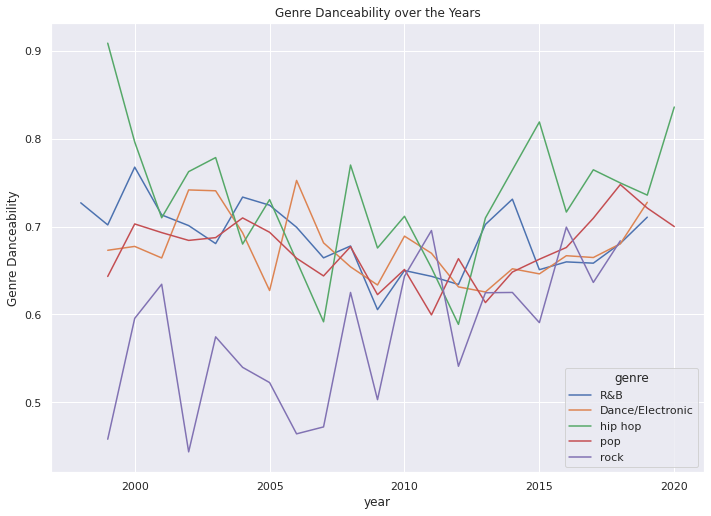

In [ ]:
sns.lineplot(x = "year", y = "genre_danceability", data = table, hue = "genre").set(title= "Genre Danceability over the Years", ylabel = "Genre Danceability")
sns.set(rc={'figure.figsize':(11.7,8.27)})

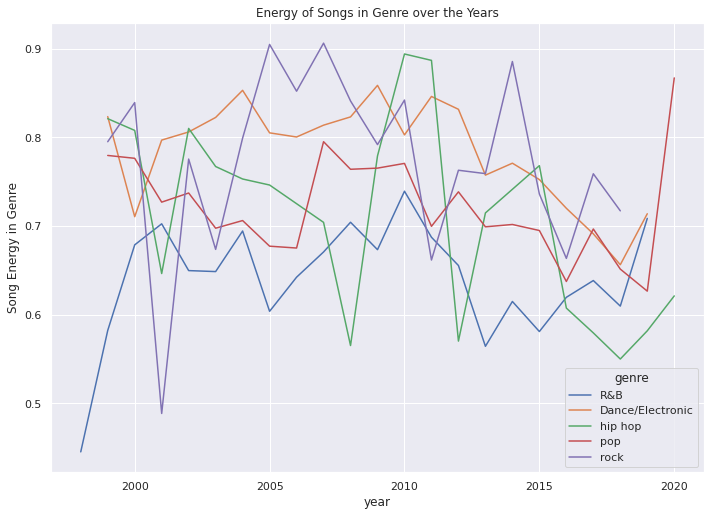

In [ ]:
sns.lineplot(x = "year", y = "genre_energy", data = table, hue = "genre").set(title= "Energy of Songs in Genre over the Years", ylabel = "Song Energy in Genre")
sns.set(rc={'figure.figsize':(11.7,8.27)})

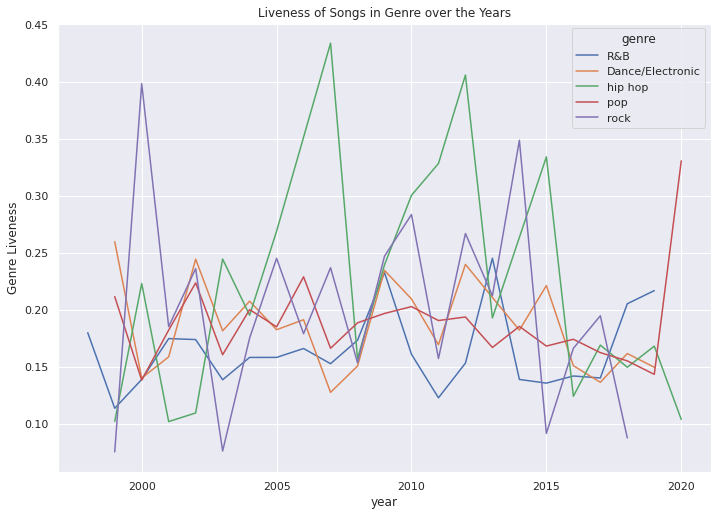

In [ ]:
sns.lineplot(x = "year", y = "genre_liveness", data = table, hue = "genre").set(title= "Liveness of Songs in Genre over the Years", ylabel = "Genre Liveness")
sns.set(rc={'figure.figsize':(11.7,8.27)})

Analyzing these graphs, we can see that genres with a high popularity, such as hip hop, also have a high danceability and liveliness score, which genres with a lower popularity (relative to the 5 genres we are focusing on) have a lower danceability and liveliness score. Energy is a factor that we noticed fluctuates throughout, regardless of genre. Taking this information into account, we can definitely attribute factors such as danceability and liveliness to what makes a song popular.

#Insights Attained
 
We took a look into what makes a song popular by seeing what qualities (danceability, liveliness) hit songs tend to have. We might not have the voice or talents to make a hit song, but now we know the characteristics that it should fit to make it viral. 
 
Due to the data being based off of Spotify results, it is definitely geared towards a younger audience, inherently skewing the graphs towards more upbeat music. However music and culture as a whole seems to be moving in that direction. Based on what we extrapolated from the dataset, we can come to a conclusion that people today like a more fast paced, lively song than back in 2000, and that it will probably stay this way for the near future. 
